# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [6]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
%matplotlib inline
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=123)

Computing t-SNE embedding


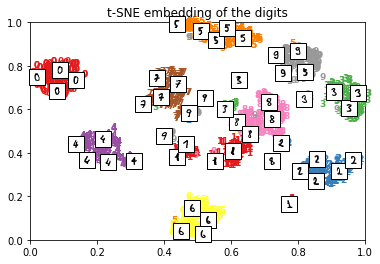

In [9]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None, pt =None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    if pt == None:
        pt = (1., 1.)
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[pt[0], pt[1]]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i])
            ax.add_artist(imagebox)
    #ax.plot(1,1, 'r*')
    plt.xticks(), plt.yticks()
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne, title = "t-SNE embedding of the digits", pt=(0, 0))

plt.show()